In [1]:
pwd

'/group/datalabgrp/ctbrown/sourmash-midgie-raker/notebooks'

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('../min-set-cov/sketches.x.gtdb.fastgather.csv')

In [4]:
print(f"{len(set(df['query_name']))} MAGs with gather results.")

11078 MAGs with gather results.


## Calculate size of GTDB min-set-cover for each bin

In [5]:
df2 = df.groupby(['query_name']).size().to_frame().rename(columns={ 0: 'countval' })
df2 = df2.sort_values(by='countval', ascending=False).reset_index(drop=False)
df2

,query_name,countval
0,AtH_MAG8234 s__JALFVM01 sp022787145 (SRR143691...,202
1,AtH_MAG275 s__Bariatricus sp004560705 (SRR8960...,195
2,AtH_MAG9972 s__Blautia_A sp003471165 (SRR11125...,194
3,AtH_MAG452 s__JALFVM01 sp022787145 (SRR8960921...,185
4,AtH_MAG6636 s__Vescimonas sp945915065 (ERR1135...,182
...,...,...
11073,AtH_MAG7148 s__RUG708 sp028724585 (SRR17241538...,2
11074,AtH_MAG5615 s__UBA2834 sp004561445 (SRR1148978...,1
11075,AtH_MAG4575 s__Staphylococcus aureus (ERR32119...,1
11076,AtH_MAG4913 s__JAAYFL01 sp012728235 (SRR865511...,1


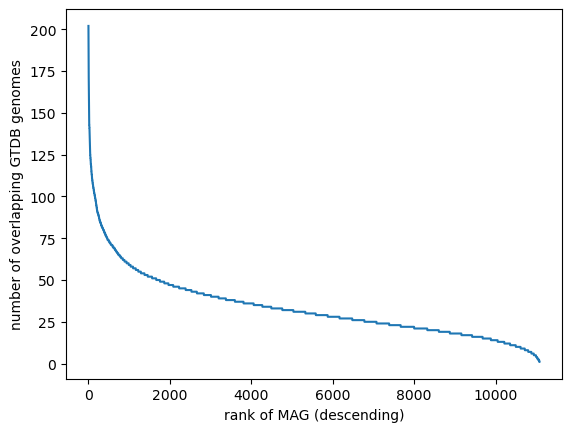

In [6]:
plt.plot(df2.index, df2.countval)
plt.xlabel('rank of MAG (descending)')
plt.ylabel('number of overlapping GTDB genomes')

plt.savefig('sketches.min-set-cov.png')

## Calculate fraction known for each sketch genome

In [7]:
df3 = df.groupby(['query_name'])['f_unique_to_query'].sum().to_frame().rename(columns={'f_unique_to_query': 'sum_f_unique'})

In [8]:
df3 = df3.sort_values(by='sum_f_unique', ascending=False).reset_index()

In [9]:
gt_df = df3['sum_f_unique'] > 0.9
print(gt_df.sum(), 'genomes are more than 90% known')
print(f"that is {gt_df.sum() / len(df3)*100:.2f}% of total genomes")

x_line = gt_df.sum()
y_line = 0.9

9300 genomes are more than 90% known
that is 83.95% of total genomes


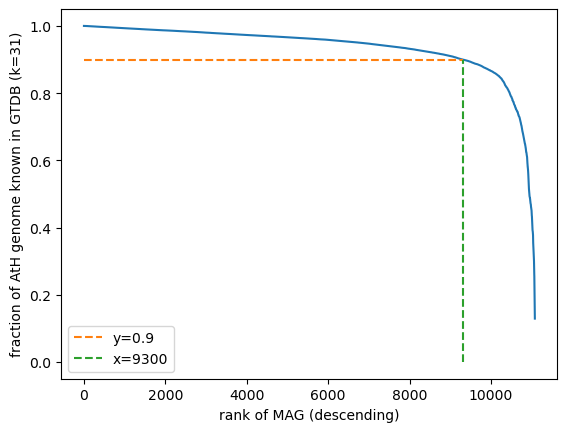

In [10]:
plt.plot(df3.index, df3['sum_f_unique'])
plt.xlabel('rank of MAG (descending)')
plt.ylabel('fraction of AtH genome known in GTDB (k=31)')
plt.plot([0, x_line], [y_line, y_line], '--', label=f'y={y_line}')
plt.plot([x_line, x_line], [0, y_line], '--', label=f'x={x_line}')
plt.legend(loc='lower left')

plt.savefig('sketches.f_known.png')